In [12]:
import pandas as pd

In [2]:
pip install kaggle

     ---------------------------------------- 90.6/90.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 163.8/163.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.11-py3-none-any.whl size=114559 sha256=c779a6f41fa2bc3c345964e4ea30022879bf4b9cf87118754020810fc95086dd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f6\55\6c\88db36c3df9594fac23b6ec8f414efe891a25cb419fe5fd342
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2022.12.7
    Uninstalling certifi-2022.12.7:
      Successfully uninstalled certifi-2022.12.7
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.


In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxx"
os.environ['KAGGLE_KEY'] = "xxxxx"
!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024

Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)




  0%|          | 0.00/1.88G [00:00<?, ?B/s]
  0%|          | 1.00M/1.88G [00:00<23:20, 1.44MB/s]
  0%|          | 2.00M/1.88G [00:00<13:47, 2.43MB/s]
  0%|          | 3.00M/1.88G [00:01<10:25, 3.22MB/s]
  0%|          | 4.00M/1.88G [00:01<08:38, 3.88MB/s]
  0%|          | 5.00M/1.88G [00:01<08:44, 3.83MB/s]
  0%|          | 6.00M/1.88G [00:02<10:50, 3.09MB/s]
  0%|          | 7.00M/1.88G [00:02<10:56, 3.06MB/s]
  0%|          | 8.00M/1.88G [00:02<12:12, 2.74MB/s]
  0%|          | 9.00M/1.88G [00:03<10:22, 3.22MB/s]
  1%|          | 10.0M/1.88G [00:03<08:58, 3.72MB/s]
  1%|          | 11.0M/1.88G [00:03<07:52, 4.24MB/s]
  1%|          | 12.0M/1.88G [00:03<07:56, 4.20MB/s]
  1%|          | 13.0M/1.88G [00:03<07:50, 4.26MB/s]
  1%|          | 14.0M/1.88G [00:04<09:29, 3.51MB/s]
  1%|          | 15.0M/1.88G [00:04<09:56, 3.35MB/s]
  1%|          | 16.0M/1.88G [00:05<11:18, 2.94MB/s]
  1%|          | 17.0M/1.88G [00:06<15:59, 2.08MB/s]
  1%|          | 18.0M/1.88G [00:06<16:46, 1.98MB/s]
 

In [1]:
from zipfile import ZipFile
import os

zip_file_name = '1-3m-linkedin-jobs-and-skills-2024.zip'
current_directory = os.getcwd()
zip_file_path = os.path.join(current_directory, zip_file_name)
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(current_directory)




In [13]:
jobskills = pd.read_csv('job_skills.csv')

In [14]:
jobskills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [15]:
null_values = jobskills.isnull().sum()
print("Null values per column:")
null_values

Null values per column:


job_link         0
job_skills    2035
dtype: int64

In [16]:
jobskills = jobskills.dropna(subset=['job_skills'])
null_values = jobskills.isnull().sum()

In [17]:
null_values

job_link      0
job_skills    0
dtype: int64

In [18]:
jobskills['job_skills']

0          Building Custodial Services, Cleaning, Janitor...
1          Customer service, Restaurant management, Food ...
2          Applied Behavior Analysis (ABA), Data analysis...
3          Electrical Engineering, Project Controls, Sche...
4          Electrical Assembly, Point to point wiring, St...
                                 ...                        
1296376    Communication Skills, Time Management, Custome...
1296377    Windows SQL, EDI X12, Edifecs Platform, Health...
1296378    Adaptability, Communication, Digital Fluency, ...
1296379    CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R...
1296380    Customer Service, Driving, Loading, Unloading,...
Name: job_skills, Length: 1294346, dtype: object

In [19]:
def skills_to_set(skills_string):
    skills_list = skills_string.split(', ')
    skill_set = set(skills_list)
    return skill_set

jobskills['job_skills'] = jobskills['job_skills'].apply(skills_to_set)
print(jobskills.head())

                                            job_link  \
0  https://www.linkedin.com/jobs/view/housekeeper...   
1  https://www.linkedin.com/jobs/view/assistant-g...   
2  https://www.linkedin.com/jobs/view/school-base...   
3  https://www.linkedin.com/jobs/view/electrical-...   
4  https://www.linkedin.com/jobs/view/electrical-...   

                                          job_skills  
0  {Janitorial Services, Communication Skills, Ex...  
1  {Problemsolving, Customer service, Valid Drive...  
2  {Verbal communication, Masters degree, BCBA ce...  
3  {Process Engineering, Work Packaging, Verbal C...  
4  {Reading blueprints and SOPs, High School or G...  


In [20]:
print(jobskills[:3])

                                            job_link  \
0  https://www.linkedin.com/jobs/view/housekeeper...   
1  https://www.linkedin.com/jobs/view/assistant-g...   
2  https://www.linkedin.com/jobs/view/school-base...   

                                          job_skills  
0  {Janitorial Services, Communication Skills, Ex...  
1  {Problemsolving, Customer service, Valid Drive...  
2  {Verbal communication, Masters degree, BCBA ce...  


In [21]:
skill = jobskills['job_skills']
skill

0          {Janitorial Services, Communication Skills, Ex...
1          {Problemsolving, Customer service, Valid Drive...
2          {Verbal communication, Masters degree, BCBA ce...
3          {Process Engineering, Work Packaging, Verbal C...
4          {Reading blueprints and SOPs, High School or G...
                                 ...                        
1296376    {TextUs, Communication Skills, Microsoft Offic...
1296377    {EDI implementations, Software testing, Struct...
1296378    {Remote Work, Problem Solving, High School Dip...
1296379    {Professional communication, BLS, Medical Assi...
1296380    {Vehicle Maintenance, PPE, Driver's license, U...
Name: job_skills, Length: 1294346, dtype: object

In [22]:
skill_list = skill.apply(lambda x: set(x)).tolist()

In [23]:
for i in range(5):
    print(skill_list[i])

{'Janitorial Services', 'Communication Skills', 'Experience in Housekeeping', 'Safety Protocols', 'Floor Maintenance', 'Attention to Detail', 'Materials Handling', 'Sanitation', 'Physical Strength', 'Housekeeping', 'Cleaning', 'Equipment Maintenance', 'Building Custodial Services', 'Waste Management'}
{'Problemsolving', 'Training', 'Customer service', "Valid Driver's License", 'Food safety', 'Restaurant management', 'Teamwork', 'Inventory', 'Supervision', 'ServSafe Certification', 'Communication', 'High School Diploma', 'Physical ability to perform job duties', "Bachelor's Degree", 'Sales', 'Motivation', 'Scheduling', 'Leadership', 'Cost control'}
{'Clearances (Act 151 Act 34 FBI Use code: 1KG6XN)', 'Verbal communication', 'Masters degree', 'Positive behavior support', 'Team collaboration', '1099', 'BCBA certification', 'Professional liability insurance', 'Staff training', 'Behavioral assessment', 'Independent contractor', 'Emotional/behavioral disorders', 'Autism', 'Data analysis', 'A

In [24]:
print(type(skill_list))

<class 'list'>


In [25]:
set_sizes = [len(skill_set) for skill_set in skill_list]

max_size = max(set_sizes)
min_size = min(set_sizes)

print("Max set size:", max_size)
print("Min set size:", min_size)

Max set size: 276
Min set size: 1


In [28]:
from collections import Counter

all_skills = [skill for skill_set in skill_list for skill in skill_set]
skill_counter = Counter(all_skills)
most_common_skills = skill_counter.most_common(300)

print("Top 300 most occurring elements:")
for skill, count in most_common_skills:
    print(skill, "-", count, "occurrences")

Top 300 most occurring elements:
Communication - 364114 occurrences
Teamwork - 224690 occurrences
Leadership - 182843 occurrences
Customer service - 165453 occurrences
Communication skills - 115733 occurrences
Customer Service - 109632 occurrences
Problem Solving - 99890 occurrences
Sales - 92372 occurrences
Problemsolving - 90822 occurrences
Nursing - 87251 occurrences
Collaboration - 85914 occurrences
Training - 82221 occurrences
Project Management - 80148 occurrences
Communication Skills - 78380 occurrences
Attention to detail - 74785 occurrences
Microsoft Office Suite - 72738 occurrences
Time management - 72065 occurrences
Time Management - 69321 occurrences
Scheduling - 63445 occurrences
Microsoft Office - 59774 occurrences
Multitasking - 58934 occurrences
Adaptability - 58243 occurrences
Patient Care - 58077 occurrences
Attention to Detail - 57128 occurrences
Flexibility - 56224 occurrences
Interpersonal skills - 55337 occurrences
Documentation - 51137 occurrences
Data Analysis -

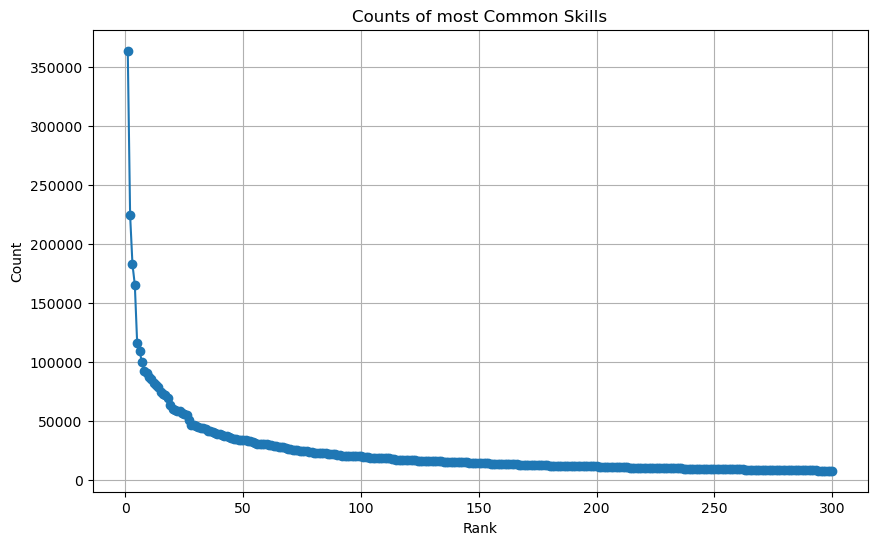

In [29]:
import matplotlib.pyplot as plt
counts = [count for skill, count in most_common_skills]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(counts) + 1), counts, marker='o', linestyle='-')
plt.title('Counts of most Common Skills')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.grid(True)
plt.show()

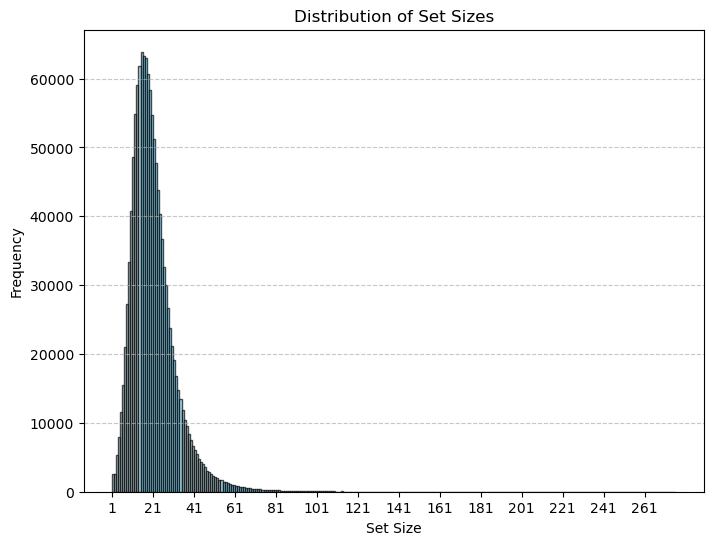

In [27]:
set_sizes = [len(skill_set) for skill_set in skill_list]

plt.figure(figsize=(8, 6))
plt.hist(set_sizes, bins=range(min(set_sizes), max(set_sizes) + 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Set Sizes')
plt.xlabel('Set Size')
plt.ylabel('Frequency')
plt.xticks(range(min(set_sizes), max(set_sizes) + 1, 20))  # Set a step size of 5 for ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
all_skills = [skill for skill_set in skill_list for skill in skill_set]
skill_counter = Counter(all_skills)
total_elements = len(all_skills)
most_common_skills = skill_counter.most_common(300)

selected_skills = []

print("Top 300 most occurring elements with at least 0.01 support:")
for skill, count in most_common_skills:
    support = count / 1294346
    if support >= 0.01:
        selected_skills.append((skill, count, support))


df = pd.DataFrame(selected_skills, columns=['Skill', 'Occurrences', 'Support'])
print(df)

Top 300 most occurring elements with at least 0.01 support:
                        Skill  Occurrences   Support
0               Communication       364114  0.281311
1                    Teamwork       224690  0.173593
2                  Leadership       182843  0.141263
3            Customer service       165453  0.127827
4        Communication skills       115733  0.089414
..                        ...          ...       ...
162                   English        13365  0.010326
163               Hospitality        13190  0.010190
164  Professional Development        13110  0.010129
165           Decision making        13105  0.010125
166                    Ethics        13026  0.010064

[167 rows x 3 columns]


In [59]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Important note: it tookk 2 hour this code to run.
def count_pairs(skill1, skill2):
    count = 0
    for skill_set in skill_list:
        if skill1 in skill_set and skill2 in skill_set:
            count += 1
    return count

candidate_pairs = pd.DataFrame(columns=['Skill1', 'Skill2', 'PairCounts'])
for i, row in df.iterrows():
    skill1 = row['Skill']
    for j, row2 in df.iterrows():
        if i != j:
            skill2 = row2['Skill']
            pair_counts = count_pairs(skill1, skill2)
            candidate_pairs = candidate_pairs.append({'Skill1': skill1, 'Skill2': skill2, 'PairCounts': pair_counts}, ignore_index=True)

print(candidate_pairs)

              Skill1                    Skill2 PairCounts
0      Communication                  Teamwork     138380
1      Communication                Leadership     116612
2      Communication          Customer service      81236
3      Communication      Communication skills       2539
4      Communication          Customer Service      57077
...              ...                       ...        ...
27717         Ethics          Dental insurance         77
27718         Ethics                   English        130
27719         Ethics               Hospitality         39
27720         Ethics  Professional Development        627
27721         Ethics           Decision making        456

[27722 rows x 3 columns]


In [32]:
excel_filename = "candidate_pairs.xlsx"
candidate_pairs.to_excel(excel_filename, index=False)

In [33]:
candidate_pairs_1 = candidate_pairs[candidate_pairs['PairCounts'] >= 13000]
candidate_pairs_1

,Skill1,Skill2,PairCounts
0,Communication,Teamwork,138380
1,Communication,Leadership,116612
2,Communication,Customer service,81236
4,Communication,Customer Service,57077
5,Communication,Problem Solving,66141
...,...,...,...
18517,Verbal Communication,Written Communication,15250
18848,Walking,Standing,15334
19622,Word,Excel,15680
21192,Vision Insurance,Dental Insurance,15515


In [34]:
candidate_pairs_1 = candidate_pairs_1.drop_duplicates(subset='PairCounts')

In [35]:
candidate_pairs_1

,Skill1,Skill2,PairCounts
0,Communication,Teamwork,138380
1,Communication,Leadership,116612
2,Communication,Customer service,81236
4,Communication,Customer Service,57077
5,Communication,Problem Solving,66141
...,...,...,...
15052,Standing,Walking,15334
15216,Written Communication,Verbal Communication,15250
16039,Written communication,Verbal communication,14652
17557,Vision,Dental,13502


In [36]:
excel_filename = "candidate_pairs11.xlsx"

candidate_pairs_1.to_excel(excel_filename, index=False)

In [37]:
triplets = []

for i in range(len(candidate_pairs_1)):
    skill1 = candidate_pairs_1.iloc[i]['Skill1']
    skill2 = candidate_pairs_1.iloc[i]['Skill2']
    j = i + 1
    
    while j < len(candidate_pairs_1) and candidate_pairs_1.iloc[j]['Skill1'] == skill1:
        skill3 = candidate_pairs_1.iloc[j]['Skill2']
        triplets.append({'Skill1': skill1, 'Skill2': skill2, 'Skill3': skill3})
        j += 1

triplets_df = pd.DataFrame(triplets)
excel_filename = "triplets8.xlsx"

triplets_df.to_excel(excel_filename, index=False)




In [38]:
triplets_df

,Skill1,Skill2,Skill3
0,Communication,Teamwork,Leadership
1,Communication,Teamwork,Customer service
2,Communication,Teamwork,Customer Service
3,Communication,Teamwork,Problem Solving
4,Communication,Teamwork,Sales
...,...,...,...
2484,Nursing,Patient Care,Patient care
2485,Nursing,Documentation,Patient care
2486,Training,Scheduling,Coaching
2487,Communication Skills,Attention to Detail,Interpersonal Skills


In [39]:
triplet_counts = {}

for index, row in triplets_df.iterrows():
    skill1 = row['Skill1']
    skill2 = row['Skill2']
    skill3 = row['Skill3']
    
    for skill_set in skill_list:
        if skill1 in skill_set and skill2 in skill_set and skill3 in skill_set:
            triplet = (skill1, skill2, skill3)
            triplet_counts[triplet] = triplet_counts.get(triplet, 0) + 1

for triplet, count in triplet_counts.items():
    print(f"Triplet {triplet} occurs together in {count} sets.")

Triplet ('Communication', 'Teamwork', 'Leadership') occurs together in 50610 sets.
Triplet ('Communication', 'Teamwork', 'Customer service') occurs together in 40032 sets.
Triplet ('Communication', 'Teamwork', 'Customer Service') occurs together in 23541 sets.
Triplet ('Communication', 'Teamwork', 'Problem Solving') occurs together in 30216 sets.
Triplet ('Communication', 'Teamwork', 'Sales') occurs together in 23267 sets.
Triplet ('Communication', 'Teamwork', 'Problemsolving') occurs together in 39138 sets.
Triplet ('Communication', 'Teamwork', 'Nursing') occurs together in 14638 sets.
Triplet ('Communication', 'Teamwork', 'Collaboration') occurs together in 17509 sets.
Triplet ('Communication', 'Teamwork', 'Training') occurs together in 15950 sets.
Triplet ('Communication', 'Teamwork', 'Project Management') occurs together in 8988 sets.
Triplet ('Communication', 'Teamwork', 'Attention to detail') occurs together in 22048 sets.
Triplet ('Communication', 'Teamwork', 'Microsoft Office S

In [41]:
triplets_count = pd.DataFrame(columns=['Skill1', 'Skill2', 'Skill3', 'Count'])

for triplet, count in triplet_counts.items():
    skill1, skill2, skill3 = triplet
    triplets_count = triplets_count.append({'Skill1': skill1, 'Skill2': skill2, 'Skill3': skill3, 'Count': count}, ignore_index=True)


In [42]:
triplets_count

,Skill1,Skill2,Skill3,Count
0,Communication,Teamwork,Leadership,50610
1,Communication,Teamwork,Customer service,40032
2,Communication,Teamwork,Customer Service,23541
3,Communication,Teamwork,Problem Solving,30216
4,Communication,Teamwork,Sales,23267
...,...,...,...,...
2483,Nursing,Patient Care,Patient care,7
2484,Nursing,Documentation,Patient care,3864
2485,Training,Scheduling,Coaching,3189
2486,Communication Skills,Attention to Detail,Interpersonal Skills,2502


In [43]:
excel_filename = "triplets_count.xlsx"

triplets_count.to_excel(excel_filename, index=False)

In [44]:
triplets_count = triplets_count[triplets_count['Count'] >= 13000]
triplets_count

,Skill1,Skill2,Skill3,Count
0,Communication,Teamwork,Leadership,50610
1,Communication,Teamwork,Customer service,40032
2,Communication,Teamwork,Customer Service,23541
3,Communication,Teamwork,Problem Solving,30216
4,Communication,Teamwork,Sales,23267
5,Communication,Teamwork,Problemsolving,39138
6,Communication,Teamwork,Nursing,14638
7,Communication,Teamwork,Collaboration,17509
8,Communication,Teamwork,Training,15950
10,Communication,Teamwork,Attention to detail,22048


In [45]:
fourlets = []

for i in range(len(triplets_count)):
    skill1 = triplets_count.iloc[i]['Skill1']
    skill2 = triplets_count.iloc[i]['Skill2']
    skill3 = triplets_count.iloc[i]['Skill3']
    j = i + 1
    while j < len(triplets_count) and triplets_count.iloc[j]['Skill2'] == skill2:
        skill4 = triplets_count.iloc[j]['Skill3']
        fourlets.append({'Skill1': skill1, 'Skill2': skill2, 'Skill3': skill3, 'Skill4': skill4})
        j += 1

fourlets_df = pd.DataFrame(fourlets)



In [46]:
fourlets_df

,Skill1,Skill2,Skill3,Skill4
0,Communication,Teamwork,Leadership,Customer service
1,Communication,Teamwork,Leadership,Customer Service
2,Communication,Teamwork,Leadership,Problem Solving
3,Communication,Teamwork,Leadership,Sales
4,Communication,Teamwork,Leadership,Problemsolving
...,...,...,...,...
209,Teamwork,Customer service,Problemsolving,Attention to detail
210,Teamwork,Customer service,Problemsolving,Time management
211,Teamwork,Customer service,Attention to detail,Time management
212,Teamwork,Problemsolving,Attention to detail,Time management


In [47]:
excel_filename = "fourlets33.xlsx"

fourlets_df.to_excel(excel_filename, index=False)

In [48]:
fourlet_counts = {}

for index, row in fourlets_df.iterrows():
    skill1 = row['Skill1']
    skill2 = row['Skill2']
    skill3 = row['Skill3']
    skill4 = row['Skill4']
    
    for skill_set in skill_list:
        if skill1 in skill_set and skill2 in skill_set and skill3 in skill_set and skill4 in skill_set:
            fourlet = (skill1, skill2, skill3, skill4)
            fourlet_counts[fourlet] = fourlet_counts.get(fourlet, 0) + 1




In [49]:
fourlets_count = pd.DataFrame(columns=['Skill1', 'Skill2', 'Skill3', 'Skill4', 'Count'])
for fourlet, count in fourlet_counts.items():
    skill1, skill2, skill3, skill4 = fourlet
    fourlets_count = fourlets_count.append({'Skill1': skill1, 'Skill2': skill2, 'Skill3': skill3, 'Skill4': skill4, 'Count': count}, ignore_index=True)


In [50]:
fourlets_count

,Skill1,Skill2,Skill3,Skill4,Count
0,Communication,Teamwork,Leadership,Customer service,13739
1,Communication,Teamwork,Leadership,Customer Service,9940
2,Communication,Teamwork,Leadership,Problem Solving,14257
3,Communication,Teamwork,Leadership,Sales,7729
4,Communication,Teamwork,Leadership,Problemsolving,15533
...,...,...,...,...,...
209,Teamwork,Customer service,Problemsolving,Attention to detail,10344
210,Teamwork,Customer service,Problemsolving,Time management,9872
211,Teamwork,Customer service,Attention to detail,Time management,8512
212,Teamwork,Problemsolving,Attention to detail,Time management,9001


In [51]:
fourlets_count = fourlets_count[fourlets_count['Count'] >= 13000]
fourlets_count

,Skill1,Skill2,Skill3,Skill4,Count
0,Communication,Teamwork,Leadership,Customer service,13739
2,Communication,Teamwork,Leadership,Problem Solving,14257
4,Communication,Teamwork,Leadership,Problemsolving,15533
17,Communication,Teamwork,Customer service,Problemsolving,21298
21,Communication,Teamwork,Customer service,Attention to detail,13094
22,Communication,Teamwork,Customer service,Time management,13086
63,Communication,Teamwork,Problemsolving,Attention to detail,14234
64,Communication,Teamwork,Problemsolving,Time management,14976


In [52]:
fivelets = [
    {"Communication", "Teamwork", "Leadership", "Customer service", "Problem Solving"},
    {"Communication", "Teamwork", "Leadership", "Customer service", "Problemsolving"},
    {"Communication", "Teamwork", "Leadership", "Problem Solving", "Problemsolving"},
    {"Communication", "Teamwork", "Customer service", "Problemsolving", "Attention to detail"},
    {"Communication", "Teamwork", "Customer service", "Problemsolving", "Time management"},
    {"Communication", "Teamwork", "Customer service", "Attention to detail", "Time management"},
    {"Communication", "Teamwork", "Problemsolving", "Attention to detail", "Time management"}
]

fivelet_counter = Counter()

for skill_set in skill_list:
    for fivelet in fivelets:
        if set(fivelet).issubset(skill_set):
            fivelet_counter[tuple(sorted(fivelet))] += 1

for fivelet, count in fivelet_counter.items():
    print(f"Fivelet {fivelet} occurs together in {count} sets.")


Fivelet ('Communication', 'Customer service', 'Leadership', 'Problemsolving', 'Teamwork') occurs together in 8394 sets.
Fivelet ('Attention to detail', 'Communication', 'Problemsolving', 'Teamwork', 'Time management') occurs together in 7317 sets.
Fivelet ('Attention to detail', 'Communication', 'Customer service', 'Problemsolving', 'Teamwork') occurs together in 8713 sets.
Fivelet ('Communication', 'Customer service', 'Problemsolving', 'Teamwork', 'Time management') occurs together in 8285 sets.
Fivelet ('Attention to detail', 'Communication', 'Customer service', 'Teamwork', 'Time management') occurs together in 6578 sets.
Fivelet ('Communication', 'Leadership', 'Problem Solving', 'Problemsolving', 'Teamwork') occurs together in 27 sets.
Fivelet ('Communication', 'Customer service', 'Leadership', 'Problem Solving', 'Teamwork') occurs together in 65 sets.


In [53]:
required_skills = {"Communication", "Teamwork", "Customer service", "Problemsolving"}

filtered_jobs = jobskills[jobskills['job_skills'].apply(lambda x: required_skills.issubset(x))]
filtered_links = filtered_jobs['job_link']
print("Job links where all four skills appear together:")
print(filtered_links)


Job links where all four skills appear together:
1          https://www.linkedin.com/jobs/view/assistant-g...
62         https://www.linkedin.com/jobs/view/%E2%80%8Bas...
105        https://www.linkedin.com/jobs/view/assistant-m...
115        https://www.linkedin.com/jobs/view/full-time-a...
253        https://www.linkedin.com/jobs/view/customer-se...
                                 ...                        
1295955    https://www.linkedin.com/jobs/view/leader-in-t...
1295957    https://www.linkedin.com/jobs/view/cable-techn...
1296333    https://www.linkedin.com/jobs/view/leader-in-t...
1296342    https://www.linkedin.com/jobs/view/engagement-...
1296360    https://www.linkedin.com/jobs/view/personal-tr...
Name: job_link, Length: 21298, dtype: object


In [54]:
filtered_links_df = pd.DataFrame(filtered_links, columns=['job_link'])
excel_filename = "filtered_job_links.xlsx"
filtered_links_df.to_excel(excel_filename, index=False)

In [56]:
df = pd.read_excel('filtered_job_links1.xlsx')
df

,job_title
0,assistant general manager
1,%E2%80%8Bassistant general manager
2,assistant manager at
3,full time assistant
4,customer service representative
...,...
21293,leader in training
21294,cable technician at
21295,leader in training
21296,engagement specialist on


In [57]:
words = ' '.join(df['job_title']).split()
word_counts = Counter(words)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
word_counts_df.reset_index(inplace=True)
word_counts_df.rename(columns={'index': 'Word'}, inplace=True)

print(word_counts_df.head(50))

              Word  Count
0               at   5417
1          manager   4041
2          service   3106
3         customer   2652
4       supervisor   1970
5        assistant   1804
6   representative   1675
7            sales   1669
8            store   1542
9             lead   1450
10       associate   1345
11          retail   1284
12            host   1187
13            time   1142
14            part    897
15          hourly    832
16         advisor    827
17      technician    677
18        training    643
19           shift    594
20            full    562
21          leader    533
22           guest    531
23             and    503
24         hostess    498
25            team    434
26      restaurant    393
27      specialist    373
28          senior    372
29      department    361
30      consultant    335
31              in    333
32          beauty    332
33           cable    322
34           staff    301
35         general    299
36          inside    273
37          

Assocaition Rules

In [58]:
confidence_threshold = 0.5
most_frequent_itemset_count = 21298
com_team_cust = 40032
com_team_prob=39138
com_cust_prob = 32835
team_cust_prob = 25066
com_team = 138380
com_cust = 81236
com_prob = 65415
team_cust = 57740
team_prob = 48322
cust_prob = 41436
prob = 90822
cust = 165453
team = 224690
com = 364114


#1st Rule : Communitcation - Teamwork-Customer service-> Problemsolving
if most_frequent_itemset_count/com_team_cust >= confidence_threshold:
    print("Comunitcation - Team - Customer Service -> Problemsolving is a valid assocation rule ", most_frequent_itemset_count/com_team_cust)
else: print("Comunitcation - Team - Customer Service -> Problemsolving is a not valid assocation rule" )
    
    
#2nd Rule : Communication - Teamwork - Problemsolving -> Customer service
if most_frequent_itemset_count/com_team_prob >= confidence_threshold:
    print("Communication - Team - Problemsolving -> Customer service isa valid assocation rule", most_frequent_itemset_count/com_team_prob)
else: print("Comunitcation - Team - Problemsolving -> Customer service is a not valid assocation rule" )    
    
#3rd Rule : Communication - Problemsolving - Customer service -> Teamwork
if most_frequent_itemset_count/com_cust_prob >= confidence_threshold:
    print("Communication - Problemsolving - Customer service -> Teamwork isa valid assocation rule", most_frequent_itemset_count/com_cust_prob)
else: print("Communication - Problemsolving - Customer service -> Teamwork is a not valid assocation rule" )
    
#4th Rule : Teamwork - Problemsolving - Customer service -> Communication
if most_frequent_itemset_count/team_cust_prob >= confidence_threshold:
    print("Teamwork - Problemsolving - Customer service -> Communication isa valid assocation rule", most_frequent_itemset_count/team_cust_prob)
else: print("Teamwork - Problemsolving - Customer service -> Communication is a not valid assocation rule" )    

#5th Rule : Communitcation - Teamwork-> Customer service - Problemsolving
if most_frequent_itemset_count/com_team >= confidence_threshold:
    print("Communitcation - Teamwork-> Customer service - Problemsolving isa valid assocation rule", most_frequent_itemset_count/com_team)
else: print("Communitcation - Teamwork-> Customer service - Problemsolving is a not valid assocation rule", most_frequent_itemset_count/com_team)    
    
#6th Rule : Communitcation - Customer service-> Teamwork - Problemsolving
if most_frequent_itemset_count/com_cust >= confidence_threshold:
    print("Communitcation - Customer service-> Teamwork - Problemsolving isa valid assocation rule", most_frequent_itemset_count/com_cust)
else: print("Communitcation - Customer service-> Teamwork - Problemsolving is a not valid assocation rule", most_frequent_itemset_count/com_cust)    
   
#7th Rule : Communitcation - Problemsolving-> Teamwork - Customer service
if most_frequent_itemset_count/com_prob >= confidence_threshold:
    print("Communitcation - Problemsolving-> Teamwork - Customer service is a valid assocation rule", most_frequent_itemset_count/com_prob)
else: print("Communitcation - Problemsolving-> Teamwork - Customer service is a not valid assocation rule", most_frequent_itemset_count/com_prob)    
   
        
#8th Rule : Teamwork - Customer service -> Communitcation - Problemsolving
if most_frequent_itemset_count/team_cust >= confidence_threshold:
    print("Teamwork - Customer service -> Communitcation - Problemsolving is a valid assocation rule", most_frequent_itemset_count/team_cust)
else: print("Teamwork - Customer service -> Communitcation - Problemsolving is a not valid assocation rule", most_frequent_itemset_count/team_cust)       
    
#9th Rule : Teamwork - Problemsolving -> Communitcation - Customer service
if most_frequent_itemset_count/team_cust >= confidence_threshold:
    print("Teamwork - Problemsolving -> Communitcation - Customer service is a valid assocation rule", most_frequent_itemset_count/team_prob)
else: print("Teamwork - Problemsolving -> Communitcation - Customer service is a not valid assocation rule", most_frequent_itemset_count/team_prob)       

#10th Rule : Customer service - Problemsolving -> Communitcation - Teamwork
if most_frequent_itemset_count/cust_prob >= confidence_threshold:
    print("Customer service - Problemsolving -> Communitcation - Teamwork is a valid assocation rule", most_frequent_itemset_count/cust_prob)
else: print("Customer service - Problemsolving -> Communitcation - Teamwork is a not valid assocation rule", most_frequent_itemset_count/cust_prob)       
##
#11th Rule : Problemsolving -> Communitcation - Teamwork -  Customer service
if most_frequent_itemset_count/prob >= confidence_threshold:
    print("Problemsolving -> Communitcation - Teamwork -  Customer service is a valid assocation rule", most_frequent_itemset_count/prob)
else: print("Problemsolving -> Communitcation - Teamwork -  Customer service is a not valid assocation rule", most_frequent_itemset_count/prob)       

#12th Rule : Customer service -> Teamwork - Problemsolving - Communitcation 
if most_frequent_itemset_count/cust >= confidence_threshold:
    print("Customer service -> Teamwork - Problemsolving - Communitcation is a valid assocation rule", most_frequent_itemset_count/cust)
else: print("Customer service -> Teamwork - Problemsolving - Communitcation is a not valid assocation rule", most_frequent_itemset_count/cust)       
    
    
#13th Rule : Teamwork -> Problemsolving - Communitcation - Customer service
if most_frequent_itemset_count/team >= confidence_threshold:
    print("Teamwork -> Problemsolving - Communitcation - Customer service is a valid assocation rule", most_frequent_itemset_count/team)
else: print("Teamwork -> Problemsolving - Communitcation - Customer service is a not valid assocation rule", most_frequent_itemset_count/team)       

    
#14th Rule : Communitcation -> Teamwork - Problemsolving - Customer service
if most_frequent_itemset_count/com >= confidence_threshold:
    print("Communitcation -> Teamwork - Problemsolving - Customer service is a valid assocation rule", most_frequent_itemset_count/com)
else: print("Communitcation -> Teamwork - Problemsolving - Customer service is a not valid assocation rule", most_frequent_itemset_count/com)       


Comunitcation - Team - Customer Service -> Problemsolving is a valid assocation rule  0.5320243804956035
Communication - Team - Problemsolving -> Customer service isa valid assocation rule 0.5441770146660535
Communication - Problemsolving - Customer service -> Teamwork isa valid assocation rule 0.6486371250190346
Teamwork - Problemsolving - Customer service -> Communication isa valid assocation rule 0.8496768531077954
Communitcation - Teamwork-> Customer service - Problemsolving is a not valid assocation rule 0.1539095244977598
Communitcation - Customer service-> Teamwork - Problemsolving is a not valid assocation rule 0.2621744054360136
Communitcation - Problemsolving-> Teamwork - Customer service is a not valid assocation rule 0.3255828173966216
Teamwork - Customer service -> Communitcation - Problemsolving is a not valid assocation rule 0.36886040872878423
Teamwork - Problemsolving -> Communitcation - Customer service is a not valid assocation rule 0.4407516245188527
Customer servic